# Exploratory Data Analysis about Electronic store sales
Dataset represents statistics on products for the 2 years period. There might be noise present in the data, as is often the case in real-world scenarios.

Column Explanation:
* date - date of the event.
* id - unique identifier of the product.
* category_id - unique identifier of the product category.
* sales - total sales amount of the product for the given date.
* views - total views of the product on the website. One user may generate multiple views, or there may be no views at all (purchases can be made not only through the website).
* price_cost - cost price of the product.
* price_retail - retail price of the product (may be lower than the cost price if the product is sold at a loss).

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modular functions for data analysis

def load_data(file_path):
    """
    Load the data from a CSV file.
    """
    return pd.read_csv(file_path)

def basic_info(df):
    """
    Display basic information about the dataframe.
    """
    print("Basic Information:")
    print(df.info())
    print("\nFirst 5 Rows:")
    print(df.head())
    print("\nSummary Statistics:")
    print(df.describe())

def handle_missing_values(df):
    """
    Handle missing values in the dataframe.
    """
    missing_values = df.isnull().sum()
    print("\nMissing Values:")
    print(missing_values[missing_values > 0])
    
    # Example strategy: Fill missing values with the mean for numerical columns
    df.fillna(df.mean(), inplace=True)
    
    # For categorical columns, we can fill with the mode
    for column in df.select_dtypes(include=['object']).columns:
        df[column].fillna(df[column].mode()[0], inplace=True)

def plot_distributions(df):
    """
    Plot the distributions of numerical columns.
    """
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    df[numerical_columns].hist(bins=15, figsize=(15, 6), layout=(2, 4))
    plt.tight_layout()
    plt.show()

def plot_categorical_distributions(df):
    """
    Plot the distributions of categorical columns.
    """
    categorical_columns = df.select_dtypes(include=['object','category']).columns
    for column in categorical_columns:
        plt.figure(figsize=(10, 4))
        sns.countplot(x=column, data=df)
        plt.xticks(rotation=45)
        plt.title(f'Distribution of {column}')
        plt.show()

def correlation_matrix(df):
    """
    Display the correlation matrix.
    """
    corr_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

def advanced_analysis(df):
    """
    Perform advanced analysis on the dataset.
    """
    # Example: Pivot table analysis
    if 'CategoryColumn' in df.columns and 'ValueColumn' in df.columns:
        pivot_table = df.pivot_table(values='ValueColumn', index='CategoryColumn', aggfunc=np.mean)
        print("\nPivot Table Analysis:")
        print(pivot_table)



In [96]:
# Load the data
data_file = r"C:\Users\User\Desktop\sales.csv\sales.csv"
df = load_data(data_file)

In [97]:
df

,date,id,category_id,sales,views,price_cost,price_retail
0,2022-02-24,1,3,0,0,0,0
1,2022-02-25,1,3,0,0,0,0
2,2022-02-26,1,3,0,0,0,0
3,2022-02-27,1,3,0,0,0,0
4,2022-02-28,1,3,0,0,0,0
...,...,...,...,...,...,...,...
2548819,2024-02-21,3482,2,0,41,2440,3170
2548820,2024-02-22,3482,2,0,23,2440,3172
2548821,2024-02-23,3482,2,0,14,2440,3172
2548822,2024-02-24,3482,2,0,17,2440,3172


In [98]:
# Display basic info
basic_info(df)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548824 entries, 0 to 2548823
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   id            int64 
 2   category_id   int64 
 3   sales         int64 
 4   views         int64 
 5   price_cost    int64 
 6   price_retail  int64 
dtypes: int64(6), object(1)
memory usage: 136.1+ MB
None

First 5 Rows:
         date  id  category_id  sales  views  price_cost  price_retail
0  2022-02-24   1            3      0      0           0             0
1  2022-02-25   1            3      0      0           0             0
2  2022-02-26   1            3      0      0           0             0
3  2022-02-27   1            3      0      0           0             0
4  2022-02-28   1            3      0      0           0             0

Summary Statistics:
                 id   category_id         sales         views    price_cost  \
count  2.548824e+06  2.548824e+06  2.

In [99]:
df.isnull().sum()

date            0
id              0
category_id     0
sales           0
views           0
price_cost      0
price_retail    0
dtype: int64

In [100]:
"""
Handle missing values in the dataframe.

"""
missing_values = df.isnull().sum()
print("\nMissing Values:")
missing_values[missing_values > 0]


Missing Values:


Series([], dtype: int64)

In [101]:
# Example strategy: Fill missing values with the mean for numerical columns
#df.fillna(df.mean(), inplace=True)

In [102]:
# For categorical columns, we can fill with the mode
#for column in df.select_dtypes(include=['object']).columns:
    #df[column].fillna(df[column].mode()[0], inplace=True)

In [103]:
df['category_id'] = df['category_id'].astype('category')

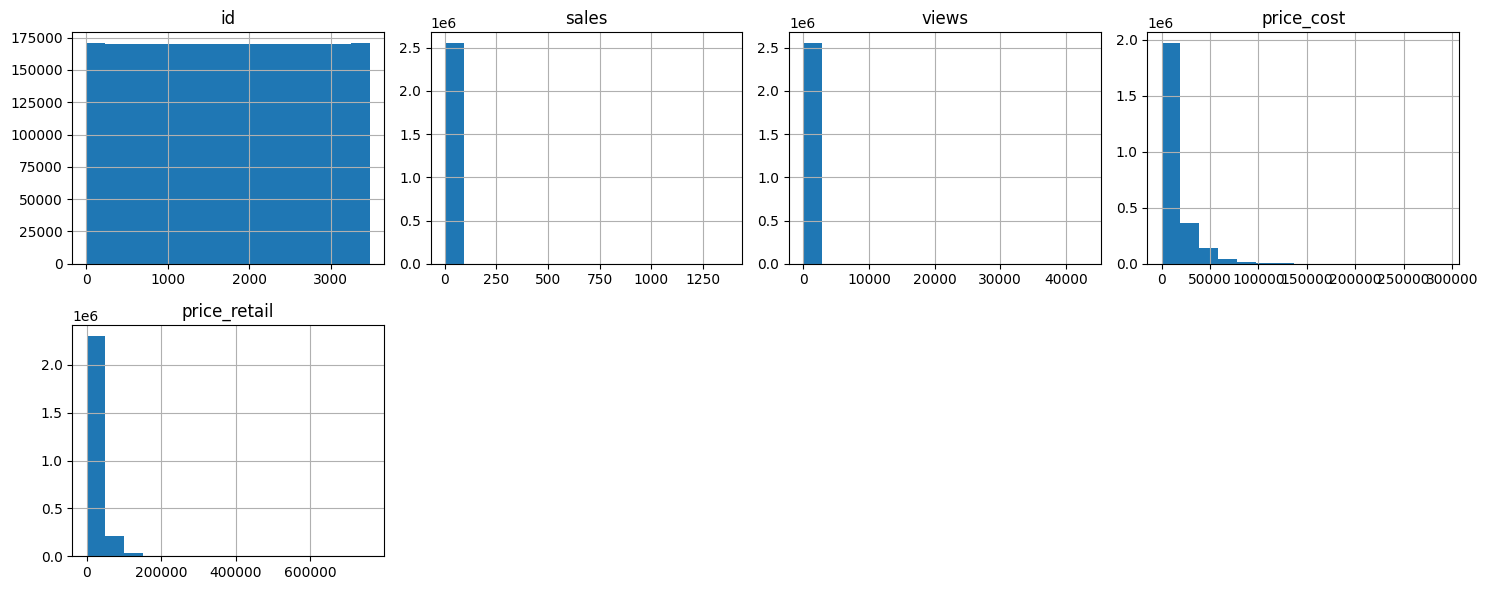

In [104]:
# Plot distributions
plot_distributions(df)

In [105]:
print(df.sales.value_counts())

sales
0      2354466
1       115760
2        32109
3        12137
4         6337
        ...   
280          1
126          1
134          1
153          1
650          1
Name: count, Length: 219, dtype: int64


In [106]:
print(df.views.value_counts())

views
0        786952
1         88316
2         76121
3         66456
4         60612
          ...  
25327         1
26320         1
14539         1
13622         1
2372          1
Name: count, Length: 2905, dtype: int64


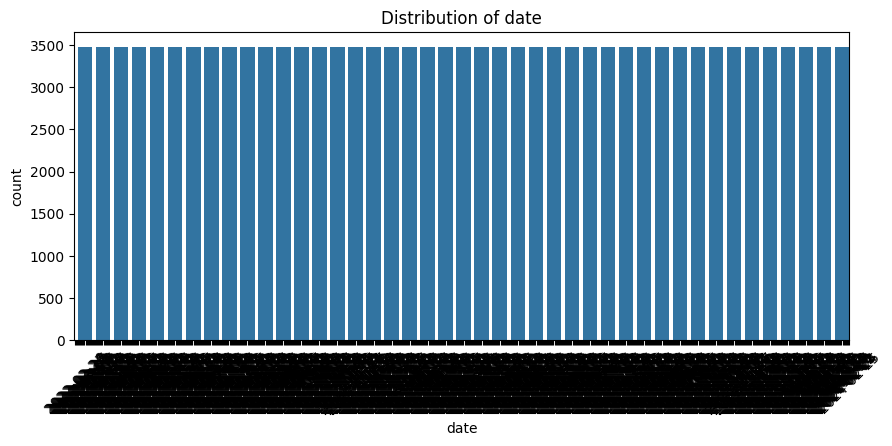

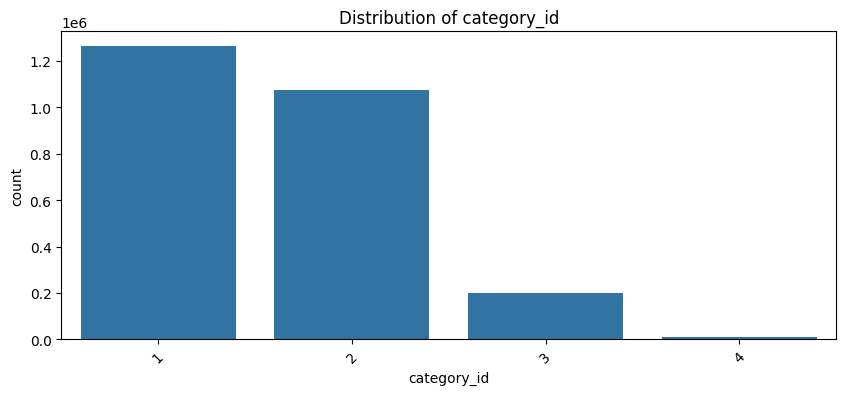

In [107]:
plot_categorical_distributions(df)

In [108]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by="date", inplace=True)

In [76]:
df["months"] = df["date"].dt.strftime('%B')
df["months"]

0          February
214476     February
1897344    February
1898076    February
1898808    February
             ...   
1693847    February
1693115    February
1692383    February
1700435    February
2548823    February
Name: months, Length: 2548824, dtype: object

In [77]:
df["years"] = df["date"].dt.year
df["years"]

0          2022
214476     2022
1897344    2022
1898076    2022
1898808    2022
           ... 
1693847    2024
1693115    2024
1692383    2024
1700435    2024
2548823    2024
Name: years, Length: 2548824, dtype: int32

In [78]:
df["year_month"] = df['years'].astype(str).str.cat(df['months'], sep='-')

In [79]:
df["year_month"]

0          2022-February
214476     2022-February
1897344    2022-February
1898076    2022-February
1898808    2022-February
               ...      
1693847    2024-February
1693115    2024-February
1692383    2024-February
1700435    2024-February
2548823    2024-February
Name: year_month, Length: 2548824, dtype: object

In [82]:
month_analysis = df.pivot_table(values=['sales', 'views'], index='year_month', aggfunc=np.sum)
month_analysis

C:\Users\User\AppData\Local\Temp\ipykernel_1220\2078096190.py:1: FutureWarning: The provided callable <function sum at 0x000001959113AD40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  month_analysis = df.pivot_table(values=['sales', 'views'], index='year_month', aggfunc=np.sum)


,sales,views
year_month,,
2022-April,23334,3837227
2022-August,26655,3580167
2022-December,54755,4754830
2022-February,4737,581725
2022-July,30803,3477956
2022-June,29997,2814556
2022-March,25369,4486744
2022-May,25748,2944549
2022-November,99393,5714593


In [85]:
month_analysis.sort_values(by = "year_month", inplace=True)

In [86]:
month_analysis

,sales,views
year_month,,
2022-April,23334,3837227
2022-August,26655,3580167
2022-December,54755,4754830
2022-February,4737,581725
2022-July,30803,3477956
2022-June,29997,2814556
2022-March,25369,4486744
2022-May,25748,2944549
2022-November,99393,5714593


In [87]:
month_num_list = [4, 8, 12, 2, 7, 6, 3, 5, 11, 10, 9, 16, 20, 24, 14, 13, 19, 16, 15, 17, 23, 22, 21, 26, 25]

In [89]:
month_analysis["month_num_list"]=month_num_list
month_analysis.sort_values(by = "month_num_list", inplace=True)
month_analysis

,sales,views,month_num_list
year_month,,,
2022-February,4737,581725,2
2022-March,25369,4486744,3
2022-April,23334,3837227,4
2022-May,25748,2944549,5
2022-June,29997,2814556,6
2022-July,30803,3477956,7
2022-August,26655,3580167,8
2022-September,33119,3331275,9
2022-October,37658,4326066,10


In [91]:
month_analysis.reset_index(inplace=True)

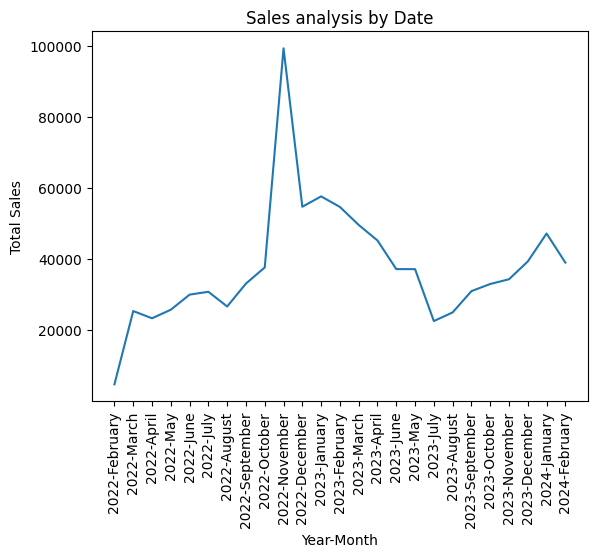

In [92]:
plt.plot(month_analysis["year_month"], month_analysis["sales"])
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('Sales analysis by Date')
plt.show()

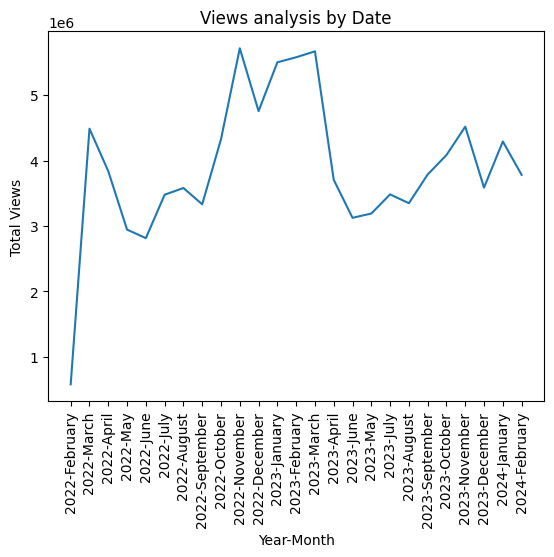

In [93]:
plt.plot(month_analysis["year_month"], month_analysis["views"])
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('Total Views')
plt.title('Views analysis by Date')
plt.show()

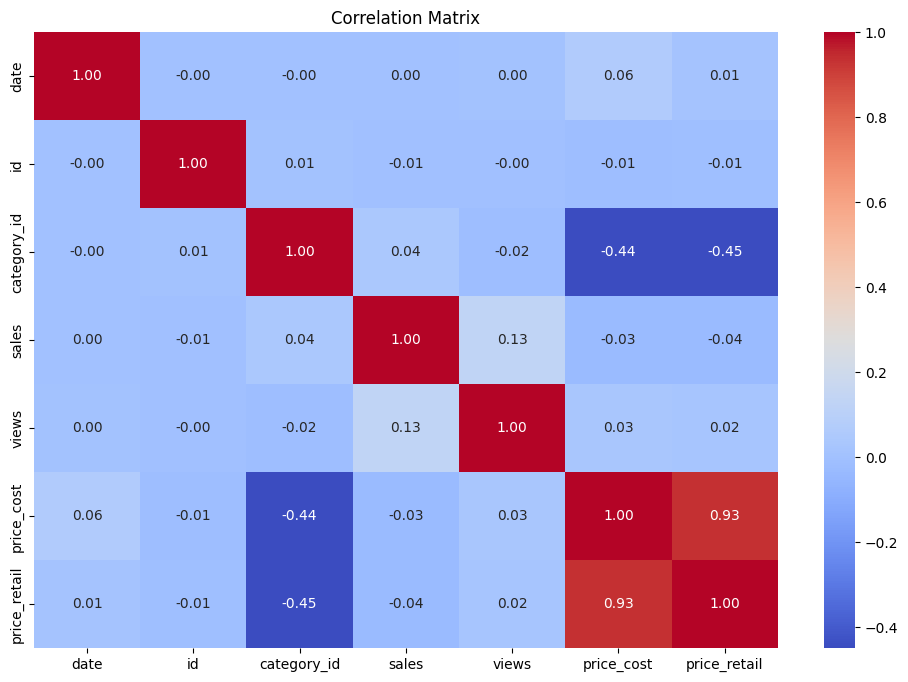

In [109]:
# Display correlation matrix
correlation_matrix(df)

In [110]:
def advanced_analysis(df):
    """
    Perform advanced analysis on the dataset.
    """
    # Example: Pivot table analysis
    if 'category_id' in df.columns and 'price_retail' in df.columns:
        pivot_table = df.pivot_table(values=['price_retail','price_cost', 'sales', 'views'], index='category_id', aggfunc=np.mean)
        print("\nPivot Table Analysis:")
        return pivot_table


In [111]:
# Perform advanced analysis
advanced_analysis(df)


Pivot Table Analysis:


C:\Users\User\AppData\Local\Temp\ipykernel_1220\580691915.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values=['price_retail','price_cost', 'sales', 'views'], index='category_id', aggfunc=np.mean)
C:\Users\User\AppData\Local\Temp\ipykernel_1220\580691915.py:7: FutureWarning: The provided callable <function mean at 0x000001959113BE20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = df.pivot_table(values=['price_retail','price_cost', 'sales', 'views'], index='category_id', aggfunc=np.mean)


,price_cost,price_retail,sales,views
category_id,,,,
1,22015.535092,31924.908972,0.100764,42.666596
2,2357.164210,3342.292336,0.690881,32.377772
3,221.785917,356.536099,0.369170,42.061667
4,62179.426503,98067.710383,0.059745,36.962568


load_data, basic_info, handle_missing_values, plot_distributions, plot_categorical_distributions, correlation_matrix, advanced_analysis

EDA( Exploratory Data Analysis) nəticəsində aşağıdakı qərarlara gəlirik:

basic_info funksiyası vasitəsilə verilənlər haqqında ümumi məlumat və statistik təhlil ilə başa düşürük ki, mean və median dəyərləri ümumi olaraq verilənlərdə bir-birindən çox fərqlənir. Bu isə data-nın sütunlarında normal paylanmadan fərqlilik olduğunu göstərir. Bunu müşahidə etmək üçün histoqram qrafiklərini qurduq.

handle_missing_values funksiyası vasitəsilə gördük ki, əksik dəyərlər yoxdur.

Yuxarıdakı statistik məlumatlar vasitəsilə aldığımız nəticələri yoxlayaq.

plot_distributions funksiyası ilə baxdıq ki, ədədi dəyişənlərdən plot_distributions funksiyası ilə baxdıq ki, ədədi dəyişənlərdən sales dəyişənini nəzərdən keçirdikdə bir çox məhsulun müxtəlif tarixlər ərzində heç satılmadığını görürük. 
print(df.sales.value_counts()) koduna əsaslanaraq satış strategiyasında müxtəlif dəyişikliklərin aparılması ön görülür.

Müstərilərin website-də görüntüləmə sayını ifadə eedən view sütununa nəzər yetirsək və bunun qarşısına sales stununu da gətirsək, məhsul görüntüləmələri ilə satışın zəif olması <mark> Marketing - Reklam strategiyalarına nəzər yetirilməsini vacib edir. <mark>

Sales Analysis by Date qrafikinə əsasən, nəticə çıxara bilərik ki, ən yüksək satış 2022-ci ilin noyabr ayında olmuşdur.
Views Analysis by Date qrafikinə əsasən, görürük ki, website-də aylar üzrə müştərilər tərəfində baxış sayı da ən çox 2022-ci ilin noyabr ayında olmuşdur. Düşünürəm ki, <mark> Bu Black Friday-ə görə keçirilən güzəştli kompaniyalar ilə əlaqədar ola bilər.<mark>

Qurduğum korrelyasiya matrisini nəzərdən keçirdikdə isə diqqətəlayiq mütənasibliklər müşahidə olunmur.

Pivot - Yekunlar analizi bizə 1-ci və 4-cü kateqoriyalı məhsullar alıcıların diqqətini daha çox cəlb etsə də, satışı 2 və 3-cü kateqoriyalı məhsulların satışına nisbətən çox azdır. 

<mark> 1-ci kateqoriyadakı məhsullara müştərilər tərəfindən baxış daha çox olduğu üçün güzəştli kompaniyaların bu kateqoriyadakı məhsullara tətbiqi satışın daha da artmasına və bunun şirkət üçün faydalı olmasına gətirib çıxarar.<mark> 